In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.show()
import seaborn as sn

In [2]:
#ID: Customer ID
#Age: Customer's age in completed years
#Experience: #years of professional experience
#Income: Annual income of the customer
#ZIP Code: Home Address ZIP code.
#Family: Family size of the customer
#CCAvg: Avg. spending on credit cards per month
#Education: Education Level. 1: Undergrad 2: Graduate 3:Advanced/Professional
#Mortgage: Value of house mortgage if any.
#Personal Loan: Did this customer accept the personal loan offered in the last campaign?
#Securities Account: Does the customer have a securities account with the bank?
#CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
#Online: Does the customer use internet banking facilities?
#Credit card: Does the customer use a credit card issued by the bank?

In [3]:
df = pd.read_csv("D:\Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.shape

(5000, 14)

In [5]:
df.ndim

2

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [9]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

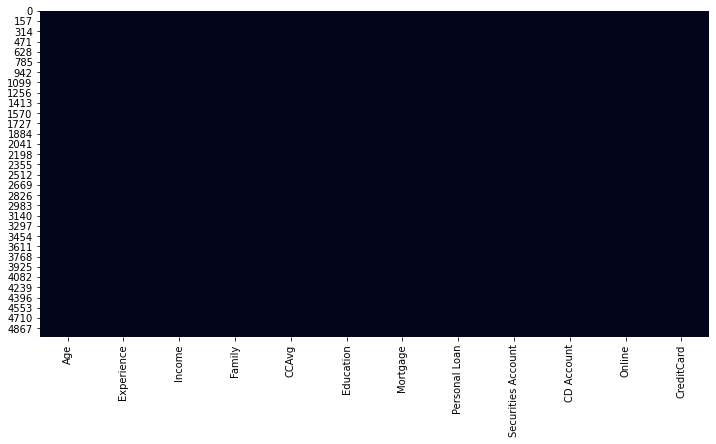

In [10]:
plt.figure(figsize=(12,6))
sn.heatmap(df.isnull(), cbar=False)
plt.show()

In [11]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

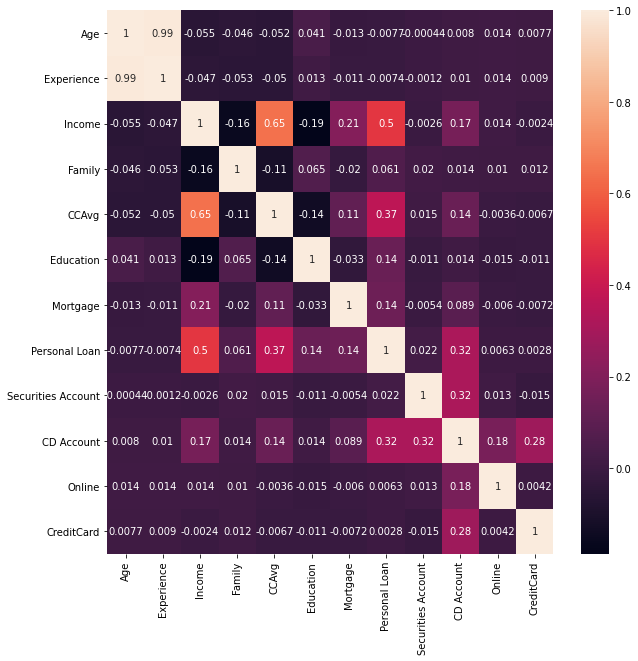

In [12]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)

In [13]:
for i in df.columns:
    print('Attribute name:',i)
    print('-------------------')
    print(df[i].value_counts())
    print('-------------------')
 

Attribute name: Age
-------------------
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
-------------------
Attribute name: Experience
-------------------
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 

In [14]:
df.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [15]:
categorical_variables= [col for col in df.columns if df[col].nunique()<=5]
print(categorical_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [16]:
categorical_variables.remove("Personal Loan")
print(categorical_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


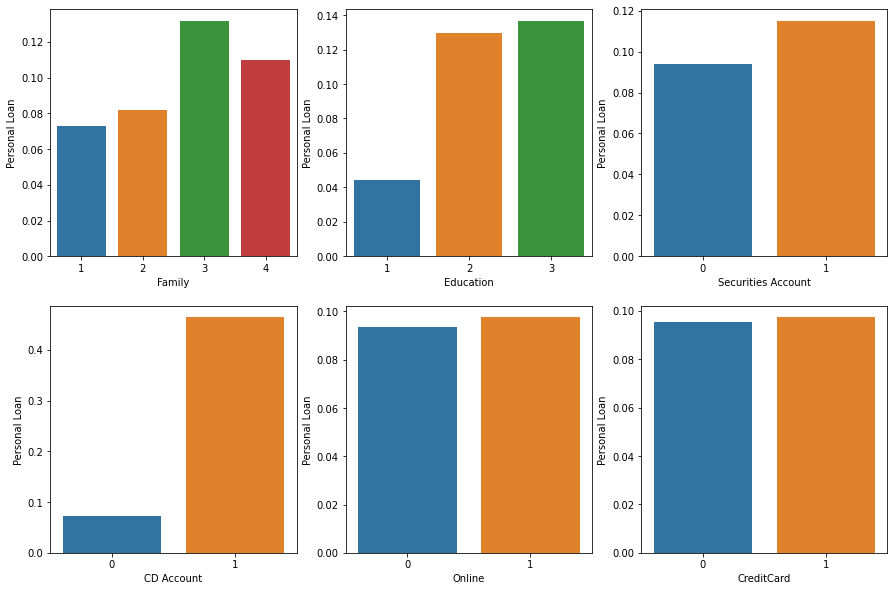

In [17]:
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sn.barplot(x=col,y='Personal Loan',data=df,ci=None)

0    4520
1     480
Name: Personal Loan, dtype: int64


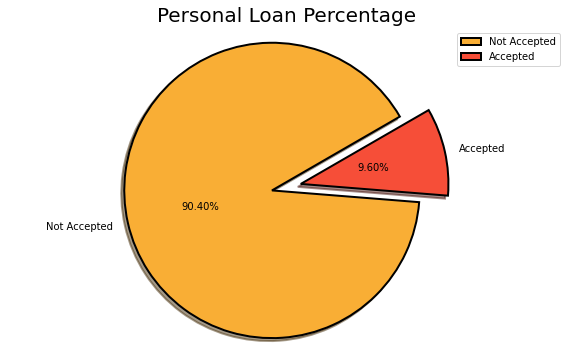

In [18]:
fig, ax = plt.subplots(figsize =(10, 6))
print(df['Personal Loan'].value_counts())
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['Personal Loan'].value_counts(), autopct='%.2f%%' ,  pctdistance=0.5, textprops={'fontsize': 10}, colors = colors,
       explode = (0, 0.20) ,
       labels = ['Not Accepted' , 'Accepted' ], 
       shadow = True, 
       startangle = 30, 
       wedgeprops =  { 'linewidth' : 2, 'edgecolor' : '#000000' })
ax.axis('equal') 
plt.title('Personal Loan Percentage', size=20)
plt.legend()
plt.show();

c:\users\mohit vashisht\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


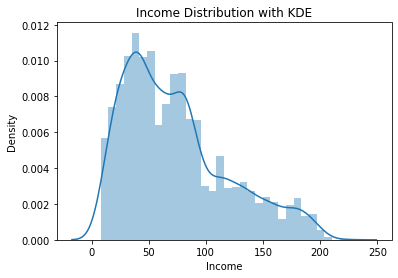

In [19]:
sn.distplot(df['Income'])
plt.title('Income Distribution with KDE');

<AxesSubplot:xlabel='Income', ylabel='Density'>

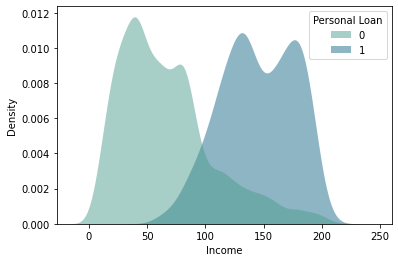

In [20]:
sn.kdeplot(
   data=df, x='Income', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

In [21]:
x = df.drop(["Personal Loan"],axis = 1)
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [22]:
y = df["Personal Loan"]
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(x)

In [25]:
scaler

StandardScaler()

In [26]:
scaled_df

array([[-1.77441684, -1.66607847, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [27]:
scale_df=pd.DataFrame(scaled_df)

In [28]:
scale_df.columns=x.columns
scale_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
scale_df_train,scale_df_test,y_train,y_test = train_test_split(scale_df,y,test_size=0.2,random_state = 10)

In [31]:
print(f"Rows in train_set: {len(scale_df_train)}\nRows in test_set: {len(scale_df_test)}\n")

Rows in train_set: 4000
Rows in test_set: 1000



In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2)
for train_index, test_index in split.split(df, df['Personal Loan']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [33]:
strat_train_set['Personal Loan'].value_counts()

0    3616
1     384
Name: Personal Loan, dtype: int64

In [34]:
3616/384

9.416666666666666

In [35]:
strat_test_set['Personal Loan'].value_counts()

0    904
1     96
Name: Personal Loan, dtype: int64

In [36]:
904/96

9.416666666666666

# Decision Tree

In [37]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(max_depth=4)
decision_tree_model

DecisionTreeClassifier(max_depth=4)

In [38]:
decision_tree_model.fit(scale_df_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
decision_tree_model.score(scale_df_train,y_train)

0.9845

In [40]:
y_pred_DT= decision_tree_model.predict(scale_df_test)
y_pred_DT

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
print(accuracy_score(y_test,y_pred_DT))

0.982


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       907
           1       0.92      0.88      0.90        93

    accuracy                           0.98      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [45]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(cm_DT)

[[900   7]
 [ 11  82]]


<AxesSubplot:>

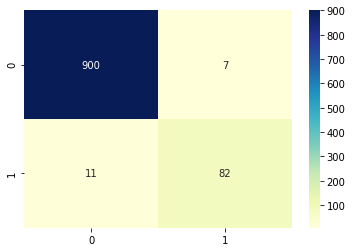

In [46]:
sn.heatmap(confusion_matrix(y_test,y_pred_DT),annot=True,fmt='',cmap='YlGnBu')

# Random Forest

In [47]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier()
classifier.fit(scale_df_train, y_train)

RandomForestClassifier()

In [48]:
predictions = classifier.predict(scale_df_test)

In [49]:
metrics.accuracy_score(predictions, y_test)

0.988

In [50]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       907
           1       0.95      0.92      0.93        93

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [52]:
cm_rm = confusion_matrix(y_test, predictions)
print(cm_rm)

[[902   5]
 [  7  86]]


<AxesSubplot:>

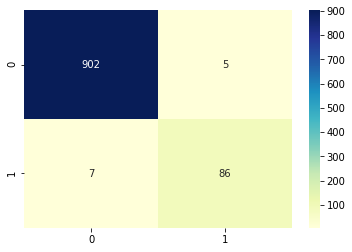

In [53]:
sn.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='',cmap='YlGnBu')

In [54]:
scale_df_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2733,0.842923,0.775752,-0.038545,0.525991,-0.937312,0.141703,0.889852,-0.341423,-0.253540,-1.216618,-0.645314
447,0.319455,0.252503,-0.060271,-1.216855,-0.307836,1.332484,-0.555524,-0.341423,-0.253540,-1.216618,-0.645314
970,1.017412,1.037377,0.026631,-0.345432,1.008342,-1.049078,1.764944,-0.341423,-0.253540,0.821951,-0.645314
125,1.279146,1.299002,0.135258,0.525991,-0.822862,-1.049078,-0.555524,-0.341423,-0.253540,0.821951,-0.645314
798,-1.425438,-1.578870,-0.777208,-1.216855,0.035515,0.141703,-0.555524,-0.341423,-0.253540,-1.216618,-0.645314
...,...,...,...,...,...,...,...,...,...,...,...
1180,-0.291258,-0.270747,0.352512,-1.216855,-1.051762,0.141703,-0.555524,-0.341423,-0.253540,-1.216618,1.549632
3441,1.628125,1.735043,-1.211715,-0.345432,-0.937312,1.332484,-0.555524,2.928915,3.944146,0.821951,1.549632
1344,0.319455,0.426919,0.417688,-1.216855,0.436091,-1.049078,-0.555524,2.928915,-0.253540,0.821951,-0.645314
4623,0.406700,0.426919,-0.625130,-0.345432,-0.765637,1.332484,-0.555524,-0.341423,-0.253540,-1.216618,-0.645314


In [57]:
y_test.ndim

1

In [63]:
y_test.shape

(1000,)

In [58]:
y_train.ndim

1

In [61]:
scale_df_test.ndim

2

In [62]:
scale_df_train.ndim

2